# Project 4C: Kpop Group Lifespan Analysis

### Overall Contents:
- Background
- Data Cleaning
- Exploratory Data Analysis
- [Modeling 1 Logistic Regression](#4.-Modeling-1-Logistic-Regression) **(In this notebook)**
- Evaluation
- Conclusion and Recommendation

### Data Dictionary



## Modeling

As this project aims to develop a model that....

## 4. Modeling: Logistic Regression

### 4.1 Libraries Import

In [2]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

### 4.2 Data Import

In [3]:
# Import data of train_df_model and test_df_model
train_df = pd.read_csv('../data/train_df_model.csv')
test_df = pd.read_csv("../data/test_df_model.csv")

### 4.3 Check train_df

#### 4.3.1 Visualize train_df

In [4]:
# Visualize the train dataframe with its proportion in wnvpresent
print(f"{train_df.wnvpresent.value_counts(normalize=True)}")
train_df.head()

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64


,date,species,latitude,longitude,wnvpresent,tmax,tmin,tavg,dewpoint,wetbulb,...,trap_T230,trap_T231,trap_T232,trap_T233,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
0,2007-05-29,3,41.954690,-87.800991,0,88.0,62.5,75.5,58.5,65.5,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,4,41.954690,-87.800991,0,88.0,62.5,75.5,58.5,65.5,...,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,4,41.994991,-87.769279,0,88.0,62.5,75.5,58.5,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,3,41.974089,-87.824812,0,88.0,62.5,75.5,58.5,65.5,...,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,4,41.974089,-87.824812,0,88.0,62.5,75.5,58.5,65.5,...,0,0,0,0,0,0,0,0,0,0


#### 4.3.2 Check for missing values in train_df

In [5]:
# Check for missing values
train_df.isnull().sum()[train_df.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
test_df.isnull().sum()[test_df.isnull().sum()>0]

Series([], dtype: int64)

**Analysis: There are no missing values**

#### 4.3.3 Drop latitude and longitude

In [7]:
train_df = train_df.drop(["latitude", "longitude"], axis = 1)
test_df = test_df.drop(["latitude", "longitude"], axis = 1)

#### 4.3.4 Dummify the species

In [8]:
# # Dummy the species
train_df = pd.get_dummies(train_df, columns = ["species"])
test_df = pd.get_dummies(test_df, columns = ["species"], drop_first = True)

In [9]:
train_df.head()

,date,wnvpresent,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,preciptotal,...,trap_T238,trap_T900,trap_T903,species_1,species_2,species_3,species_4,species_5,species_6,species_7
0,2007-05-29,0,88.0,62.5,75.5,58.5,65.5,0.0,10.5,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2007-05-29,0,88.0,62.5,75.5,58.5,65.5,0.0,10.5,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2007-05-29,0,88.0,62.5,75.5,58.5,65.5,0.0,10.5,0.0,...,0,0,0,0,0,0,1,0,0,0
3,2007-05-29,0,88.0,62.5,75.5,58.5,65.5,0.0,10.5,0.0,...,0,0,0,0,0,1,0,0,0,0
4,2007-05-29,0,88.0,62.5,75.5,58.5,65.5,0.0,10.5,0.0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
test_df.head()

,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,...,trap_T238,trap_T900,trap_T903,species_1,species_2,species_3,species_4,species_5,species_6,species_7
0,2008-06-11,86.0,63.5,75.0,55.5,64.0,0.0,10.0,0.0,29.31,...,0,0,0,0,0,1,0,0,0,0
1,2008-06-11,86.0,63.5,75.0,55.5,64.0,0.0,10.0,0.0,29.31,...,0,0,0,0,0,0,1,0,0,0
2,2008-06-11,86.0,63.5,75.0,55.5,64.0,0.0,10.0,0.0,29.31,...,0,0,0,0,1,0,0,0,0,0
3,2008-06-11,86.0,63.5,75.0,55.5,64.0,0.0,10.0,0.0,29.31,...,0,0,0,0,0,0,0,1,0,0
4,2008-06-11,86.0,63.5,75.0,55.5,64.0,0.0,10.0,0.0,29.31,...,0,0,0,0,0,0,0,0,0,1


#### 4.3.5 Convert date to month

As observe in the exploratory data analysis section on weather, the weather features are related by months rather than year or date. Hence, we will use the month for our analysis.

In [11]:
# Convert the date to month for train_df
train_df.date = pd.to_datetime(train_df.date)
train_df.date = train_df.date.dt.month

# Convert the date to month for test_df
test_df.date = pd.to_datetime(test_df.date)
test_df.date = test_df.date.dt.month

### 4.3 Set the X and y variable

In [12]:
x_data_train = train_df.drop("wnvpresent", axis = 1)
y_data_train = train_df["wnvpresent"]

In [13]:
#Verify the dimensions
print(f"Train x_data shape is {x_data_train.shape}")
print(f"Train y_data shape is {y_data_train.shape}")

Train x_data shape is (10506, 173)
Train y_data shape is (10506,)


### 4.4 Split the data into train/val data

The data will be named as train and val, while the test refers to the kaggle test.

In [14]:
print('Original dataset shape %s' % Counter(y_data_train))

Original dataset shape Counter({0: 9955, 1: 551})


In [15]:
# Perform an oversampling of y_data due to the unbalanced data
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_data_train, y_data_train)

# Perform a train, val split on the data on the resampled data
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=.25, random_state=42, stratify= y_sm)

In [16]:
print('Resampled dataset shape %s' % Counter(y_sm))

Resampled dataset shape Counter({0: 9955, 1: 9955})


In [17]:
#Verify Dimensions
print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X val: ', X_val.shape)
print('y val: ', y_val.shape)
print('test: ', test_df.shape)

X train:  (14932, 173)
y train:  (14932,)
X val:  (4978, 173)
y val:  (4978,)
test:  (116293, 173)


### 4.5 Null model

Null model is a model that does not have any predictor values and uses the mean of the target Y as a prediction. This is also define as a baseline accuracy and the performance of the model will be compared with this baseline accuracy to understand if the model is performing better than null model and whether the trained model has any predictor values.

In [18]:
y_null = y_train.value_counts(normalize = True)
y_null.max()

0.5

### 4.6 Logistic Regression

Logistic regression is the classification to find the probability of the event success and its failure. It categorizes the data into discrete classes and forms a sigmoid function with an output of probability.
It can be used for multinomial regression and a probabilitics view of class predictions. However, logistic regression may be prone to unbalanced data, overfitting if the number of features is more than the number of observatios and will need to standardized the variables of different scales. In addition, it requires average or no multicollinearity between independent variables. 

As our data consists of unbalanced data with of west nile present of 0: 1 if 0.9476: 0.0524, we have perform oversampling as above to enhance the training of the under-represented sample. We have also employ saga solver that supports multiclass problems and large datasets.

In [19]:
# Perform a standardscaler
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)
test_sc = ss.transform(test_df)

In [20]:
# Pipeline for logistic Regression
logreg_pipe = Pipeline(steps = [("logreg", LogisticRegression())])

In [21]:
# Setting the hyperparameters values to gridsearch over

gs_pipe_params = {
    "logreg__solver":['saga'],
    "logreg__penalty": ['none', 'l1', 'l2'],
    "logreg__random_state":[42],
    "logreg__C": [0.0001,0.001, 0.01, 0.1, 1.0],
    "logreg__max_iter": [5000, 7500],
}

In [22]:
# Instantiate GridSearchCV
gs_logreg = GridSearchCV(logreg_pipe, param_grid = gs_pipe_params, cv = 5, verbose = 1, n_jobs = -1)

In [23]:
# Fit GridSearch to training data
gs_logreg.fit(X_train_sc, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\cxliew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=Pipeline(steps=[('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'logreg__max_iter': [5000, 7500],
                         'logreg__penalty': ['none', 'l1', 'l2'],
                         'logreg__random_state': [42],
                         'logreg__solver': ['saga']},
             verbose=1)

In [24]:
#The best score
gs_logreg.best_score_

0.9398606733218362

In [25]:
# Obtain the best parameters
gs_logreg.best_params_

{'logreg__C': 0.0001,
 'logreg__max_iter': 7500,
 'logreg__penalty': 'none',
 'logreg__random_state': 42,
 'logreg__solver': 'saga'}

In [26]:
# Fit with the best parameters
logreg_best_model = gs_logreg.best_estimator_.fit(X_train_sc, y_train)
logreg_best_model.fit(X_train_sc, y_train)

C:\Users\cxliew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\cxliew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Pipeline(steps=[('logreg',
                 LogisticRegression(C=0.0001, max_iter=7500, penalty='none',
                                    random_state=42, solver='saga'))])

In [27]:
# Score on the training set
logreg_best_model.score(X_train_sc, y_train)

0.9418028395392446

In [28]:
# Score on the testing set (accuracy)
logreg_best_model.score(X_val_sc, y_val)

0.9415427882683809

In [29]:
# Obtain predictions
y_pred_logreg = logreg_best_model.predict(X_val_sc)

In [30]:
# Confusion Matrix
cm_logreg = confusion_matrix (y_val, y_pred_logreg)
tn, fp, fn, tp = cm_logreg.ravel()

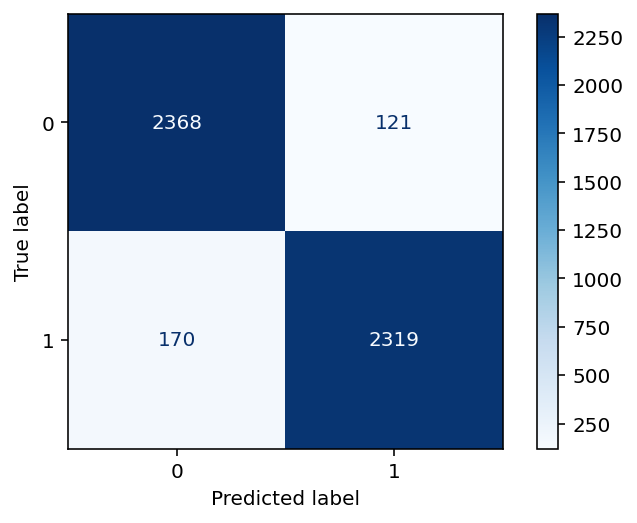

In [31]:
# Plot the consfusion matrix
plot_confusion_matrix(gs_logreg, X_val_sc, y_val, cmap = 'Blues', values_format = 'd')

In [32]:
print(classification_report(y_val,  y_pred_logreg))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2489
           1       0.95      0.93      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978



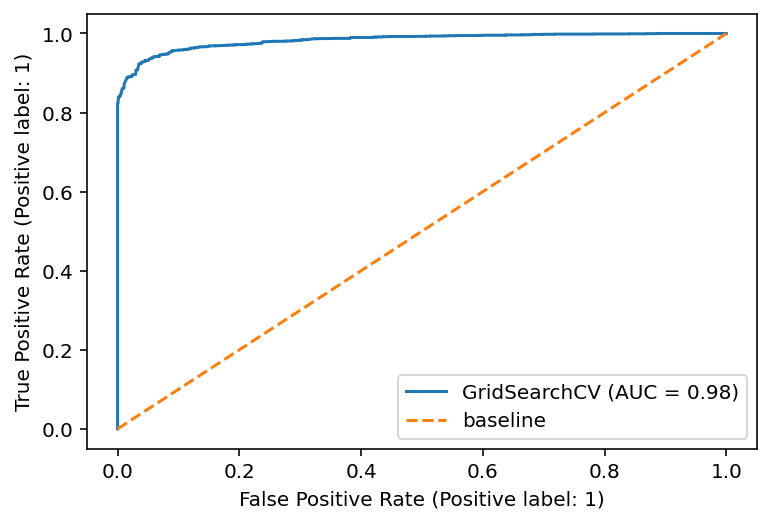

In [33]:
# Plot the ROC curve
plot_roc_curve(gs_logreg, X_val_sc, y_val)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [34]:
pred_df = pd.DataFrame({'true_values': y_val,
                        'pred_probs': gs_logreg.predict_proba(X_val_sc)[:,1]})

pred_df.head()

,true_values,pred_probs
8314,0,0.004146
4522,0,0.015750
13383,1,0.999914
10520,1,0.999955
19862,1,0.704054


C:\Users\cxliew\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


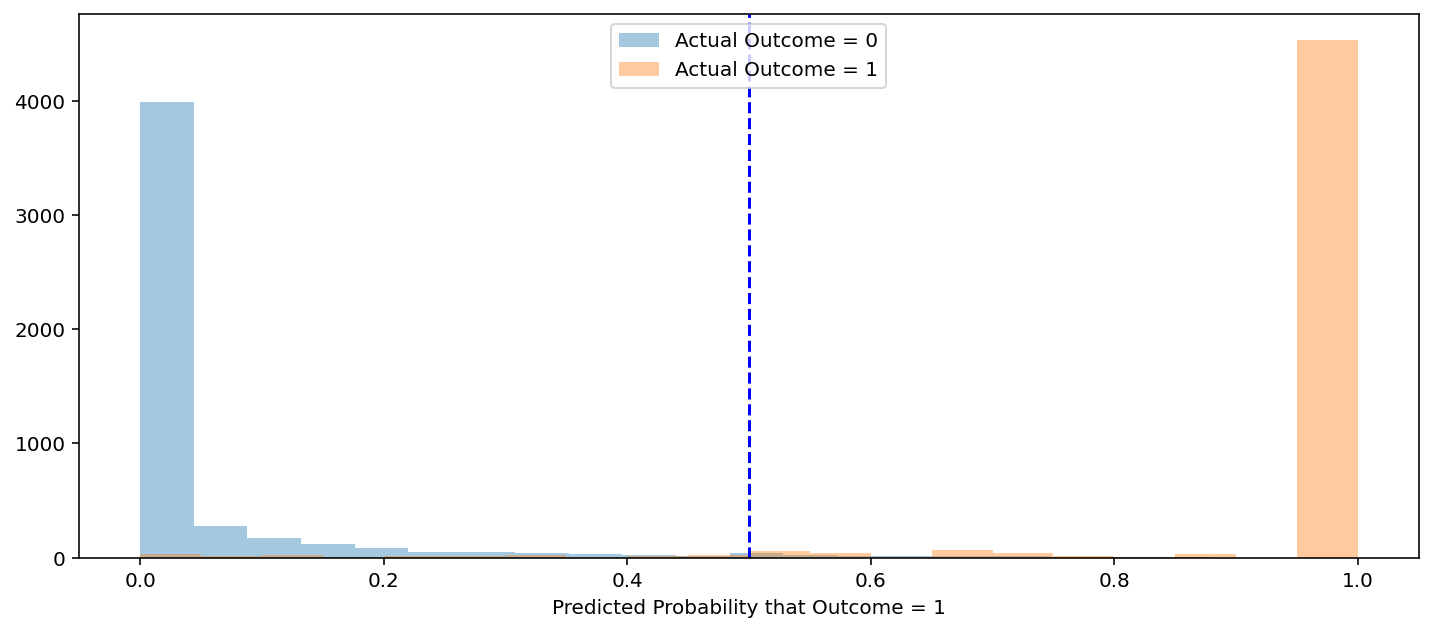

In [35]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}')
plt.axvline(0.5, color = 'blue', linestyle = '--')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend(loc = 9);

In [36]:
# Obtain Kaggle predictions
# kaggle_pred_logreg = gs_logreg.predict_proba(test_sc)
# results = pd.DataFrame(kaggle_pred_logreg,columns=['NotPresent','WnvPresent'])
# results = pd.concat([pd.read_csv("../assets/test.csv")['Id'],results], axis =1)
# results.drop('NotPresent', axis =1).to_csv("../data/logreg_model_oversam_monthss.csv", index = False)

### Model Evaluation

**Summary Table: Model Evaluation**

| Model| Model Best Score|Training Score (Accuracy)       |   Testing Score (Accuracy)   | Sensitivity |  Specificity  | Precision | F1 score | ROC AUC score |
|:-------------------:|:-------------------:|:-------:|:----------:|:-----------------:|:----------------:|:-----------------:|:-----------------:|:-----------------:|
| Null |  0.50 |    0.50  |     0.50    |       NA      |      NA   |NA|NA|NA
|Logistic regression| 0.94 |  0.94  | 0.94 |   0.93  | 0.95   |0.94|0.94|0.98

The evaluation for model performance.

**1. Null Model** 

In our modeling, logistic regression has a score of 0.94 in comparison with the null model which is 0.5, thus, the model have some predictor value.


**2. Logistic Regression**

In our modeling, the logistic regression have a training and testing score of 0.94, which indicates that 94% of the variability of the presence of west nile virus can be explained by the x predictors in our model. The model has a sensitivity of 0.93 and specificity of 0.95, which means the model is able to correctly predict 93% of the samples for true positives and 95% of the samples for true negatives. The model has a precision of 0.94 in accurately correctly identifying the presence of west nile virus. As our team explores to reduce the transmission rate and reduce the wastage of resources, F1 score will be evaluated as the model's success to identify the presence of west nile virus in a given location, time and species that takes into account the false positive and false negative. In this model, the F1 score is 0.94. This model has a receiver operating characteristics (ROC) area under the curve(AUC) score of 0.98, which indicates the performance of the model in separating the two categories of west nile virus absence and presence.

### 4.6. Summary

* Logistic regression have an acccuracy of 0.94, which indicates that 94% of the variability of the presence of west nile virus can be explained by the x predictors in our model
* The model is able to correctly predict 93% of the samples for true positives and 95% of the samples for true negatives with a precision of 94% in accurately correctly identifying the presence of west nile virus. 
* This model has a performance of 98% in separating the two categories of west nile virus absence and presence.